In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("test.csv")

In [4]:
x = df.isnull().sum().sort_values(ascending=False)
for i,j in x.items():
    if j>0:
        print(i,j)

PoolQC 1456
MiscFeature 1408
Alley 1352
Fence 1169
FireplaceQu 730
LotFrontage 227
GarageYrBlt 78
GarageQual 78
GarageFinish 78
GarageCond 78
GarageType 76
BsmtCond 45
BsmtQual 44
BsmtExposure 44
BsmtFinType1 42
BsmtFinType2 42
MasVnrType 16
MasVnrArea 15
MSZoning 4
BsmtHalfBath 2
Utilities 2
Functional 2
BsmtFullBath 2
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
KitchenQual 1
TotalBsmtSF 1
Exterior2nd 1
GarageCars 1
Exterior1st 1
GarageArea 1
SaleType 1


<Axes: >

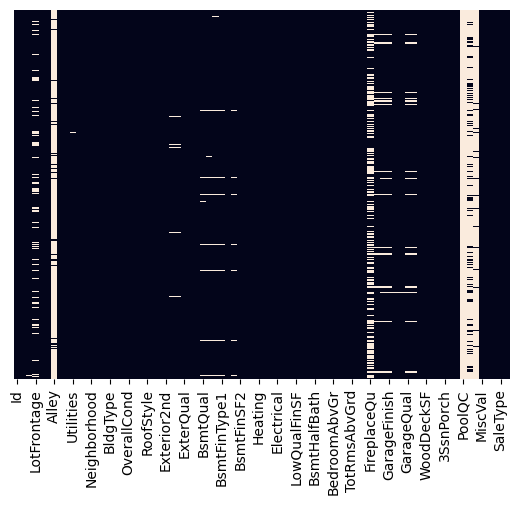

In [3]:
sns.heatmap(df.isnull(), yticklabels = False,cbar = False)

In [5]:
df['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [6]:
df['MSZoning'] = df['MSZoning'].fillna(df.MSZoning.mode()[0])

In [7]:
df.shape

(1459, 80)

In [9]:
cols = df.select_dtypes(include='object').columns.to_list()

In [22]:
null_values = df.isnull().sum().sort_values(ascending=False)

In [12]:
for i,j in null_values.items():
    if j>0:
        if i in cols:
            print(i,j)

PoolQC 1456
MiscFeature 1408
Alley 1352
Fence 1169
FireplaceQu 730
GarageCond 78
GarageFinish 78
GarageQual 78
GarageType 76
BsmtCond 45
BsmtQual 44
BsmtExposure 44
BsmtFinType2 42
BsmtFinType1 42
MasVnrType 16
Utilities 2
Functional 2
KitchenQual 1
Exterior2nd 1
SaleType 1
Exterior1st 1


In [13]:
def replace_with_mode(col):
    df[col] = df[col].fillna(df[col].mode()[0])

In [14]:
for i,j in null_values.items():
    if j<1169:
        if i in cols:
            replace_with_mode(i)

In [17]:
for i,j in null_values.items():
    if j>0:
        if i in cols:
            print(i,j)

PoolQC 1456
MiscFeature 1408
Alley 1352
Fence 1169


In [18]:
df.drop(['PoolQC','Fence','MiscFeature'],axis = 1, inplace=True)

In [19]:
df.drop(['Alley'], axis = 1, inplace=True)

In [20]:
df.shape

(1459, 76)

In [29]:
for i,j in df.isnull().sum().items():
    if j>0:
        df[i].fillna(df[i].mean(), inplace=True)

In [30]:
for i,j in df.isnull().sum().items():
    if j>0:
        print(i)

In [31]:
df.to_csv('xtest.csv', index=False)